In [1]:
from langgraph.graph import StateGraph, START ,END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv



f:\LangGraph-Learning\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
load_dotenv()  # take environment variables from .env.

True

In [3]:
import os
model = ChatOpenAI(api_key=os.getenv("OPENROUTER_API_KEY"), 
                   base_url="https://openrouter.ai/api/v1", 
                   model="openai/gpt-oss-120b:free")

In [17]:
model = ChatOpenAI()

In [4]:
class LLMState(TypedDict):

    question :str
    answer:str

In [5]:
def llm_qa(state : LLMState )-> LLMState:
    
    #extract question from state
    question = state['question']

    #form a prompt
    prompt = f"Answer the following question concisely: {question}"

    #get answer from llm model
    answer = model.invoke(prompt).content

    #update state with answer
    state['answer'] = answer

    return state

In [6]:
graph= StateGraph(LLMState)

graph.add_node('LLM_qa', llm_qa)


graph.add_edge(START,'LLM_qa')
graph.add_edge('LLM_qa', END)

workflow= graph.compile()

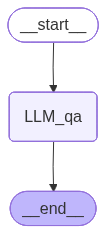

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
initial_state = {'question': "How far is moon from earth?"}

final_state = workflow.invoke(initial_state)

print(final_state['answer'])

The Moon is about **384,400 km (≈238,900 mi)** from Earth on average.
